In [70]:
# Importing libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
Leagues = ['Premier_League','Bundesliga','La_Liga','Ligue-1','Serie-A']

In [72]:
for league in Leagues:
    print(league)
    df = pd.read_csv(f"Competive_Index_{league}")
    del df['Unnamed: 0']
    df['League'] = league
    print(df.columns)
    if league == 'Premier_League':
        Leagues_combined = pd.DataFrame(columns=df.columns)
    Leagues_combined = pd.concat([Leagues_combined,df])

Premier_League
Index(['Seasons', 'Champions', 'Competitive_Index', 'League'], dtype='object')
Bundesliga
Index(['Seasons', 'Champions', 'Competitive_Index', 'League'], dtype='object')
La_Liga
Index(['Seasons', 'Champions', 'Competitive_Index', 'League'], dtype='object')
Ligue-1
Index(['Seasons', 'Champions', 'Competitive_Index', 'League'], dtype='object')
Serie-A
Index(['Seasons', 'Champions', 'Competitive_Index', 'Competitive_Index_trend',
       'League'],
      dtype='object')


C:\Users\Admin\AppData\Local\Temp\ipykernel_2744\412737358.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Leagues_combined = pd.concat([Leagues_combined,df])


In [73]:
Leagues_combined = Leagues_combined[Leagues_combined.columns[:-1]]

In [74]:
def MinMax_Scaling(feature):
    feat = np.array(feature)
    min_,max_ = np.min(feat),np.max(feat)
    scaling = (feat- min_)/(max_- min_)
    return scaling

In [75]:
Leagues_combined_scaled =  Leagues_combined.copy()
Leagues_combined_scaled['Competitive_Index'] =  MinMax_Scaling(Leagues_combined['Competitive_Index'])

In [76]:
Leagues_combined_scaled

,Seasons,Champions,Competitive_Index,League
0,1992-1993,Manchester Utd,0.648640,Premier_League
1,1993-1994,Manchester Utd,0.583400,Premier_League
2,1994-1995,Blackburn,0.543891,Premier_League
3,1995-1996,Manchester Utd,0.712769,Premier_League
4,1996-1997,Manchester Utd,0.869091,Premier_League
...,...,...,...,...
24,2019-2020,Juventus,0.544394,Serie-A
25,2020-2021,Inter,0.436952,Serie-A
26,2021-2022,Milan,0.611667,Serie-A
27,2022-2023,Napoli,0.653847,Serie-A


In [77]:
Leagues_combined_scaled = Leagues_combined_scaled[Leagues_combined_scaled['Seasons'] > '2015-2016']

In [78]:
Leagues_combined_scaled

,Seasons,Champions,Competitive_Index,League
24,2016-2017,Chelsea,0.463130,Premier_League
25,2017-2018,Manchester City,0.337021,Premier_League
26,2018-2019,Manchester City,0.404855,Premier_League
27,2019-2020,Liverpool,0.377745,Premier_League
28,2020-2021,Manchester City,0.635653,Premier_League
29,2021-2022,Manchester City,0.342463,Premier_League
30,2022-2023,Manchester City,0.489689,Premier_League
31,2023-2024,Manchester City,0.389813,Premier_League
28,2016-2017,Bayern Munich,0.251562,Bundesliga
29,2017-2018,Bayern Munich,0.341060,Bundesliga


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, '2016-2017'),
  Text(1, 0, '2017-2018'),
  Text(2, 0, '2018-2019'),
  Text(3, 0, '2019-2020'),
  Text(4, 0, '2020-2021'),
  Text(5, 0, '2021-2022'),
  Text(6, 0, '2022-2023'),
  Text(7, 0, '2023-2024')])

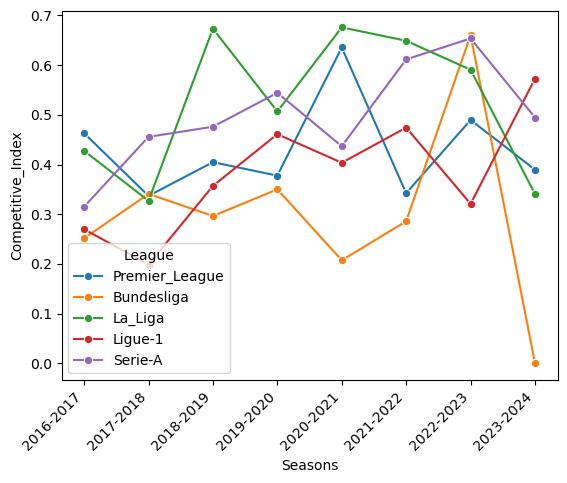

In [79]:
sns.lineplot(data=Leagues_combined_scaled,x='Seasons',y='Competitive_Index', hue='League' ,marker='o', linestyle='-')
plt.xticks(rotation=45, ha='right')

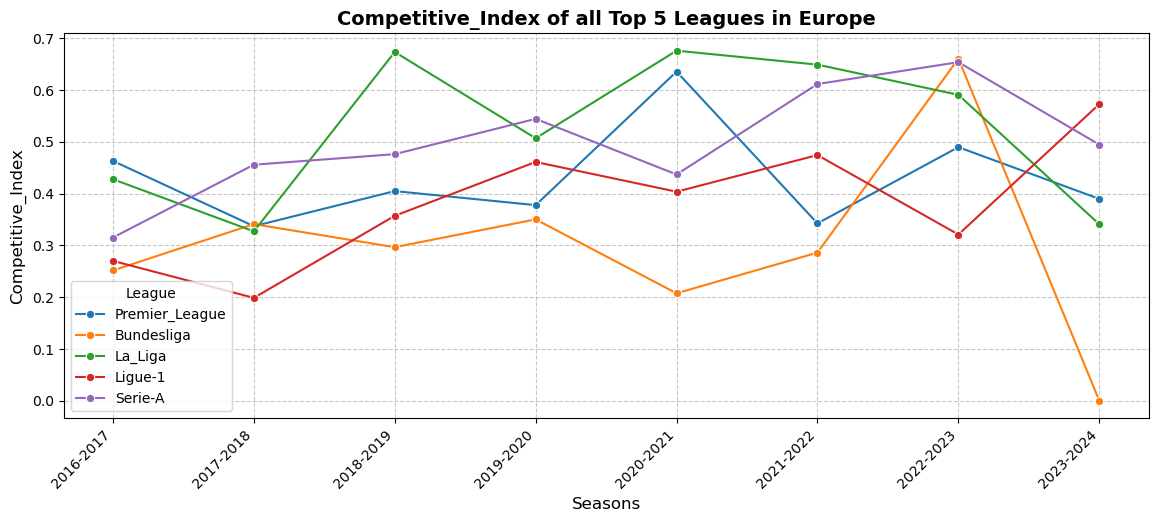

In [80]:
# Set figure size
plt.figure(figsize=(14, 5))


# Create line plot with markers and styling
sns.lineplot(data=Leagues_combined_scaled, x='Seasons', y='Competitive_Index', hue='League' ,marker='o', linestyle='-')

plt.xticks(rotation=45, ha='right')  # Rotate for better readability
# plt.xticks(range(len(Leagues_combined_scaled['Seasons'])), Leagues_combined_scaled['Seasons']) 

# Add grid, title, and labels
plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Seasons', fontsize=12)
plt.ylabel('Competitive_Index', fontsize=12)
plt.title('Competitive_Index of all Top 5 Leagues in Europe', fontsize=14, fontweight='bold')

# Adjust layout
# plt.tight_layout()
plt.show()